<a href="https://colab.research.google.com/github/hyp3r5pace/Machine-learning-lab/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
import math
import copy

# to prevent ipython from priniting any warning
warnings.filterwarnings('ignore')

# **Single Layer Perceptron**

# **Question 1**

In [ ]:
# load the iris dataset

iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# loading the class value samples into a dataframe
df_class = pd.DataFrame(iris.target, columns=['target'])

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# creating a global set of training and test set which is randomly generated (will be used both in SLP and MLP evaluation)
index = [i for i in range(150)]
indexSubSet = [0 for i in range(6)]
for x in range(1, 7):
  temp = []
  for j in range(10):
    temp.append(random.sample(index, int(x * 15)))
  indexSubSet[x-1] = copy.deepcopy(temp)

In [ ]:
# creating a global set of 10 training sets which is randomly generated
indexSubSet1=  [0 for i in range(10)]
for j in range(10):
  indexSubSet1[j] = random.sample(index, int(7 * 15))

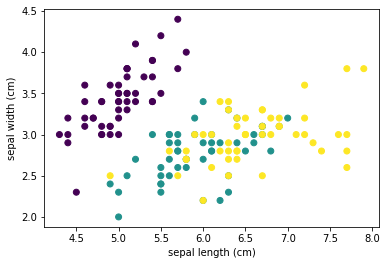

No handles with labels found to put in legend.


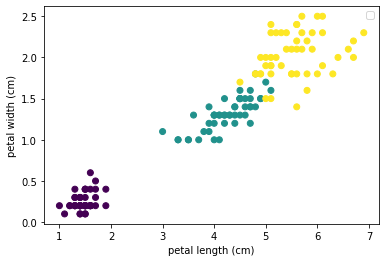

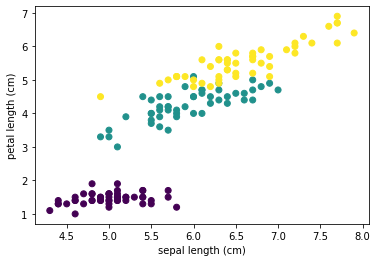

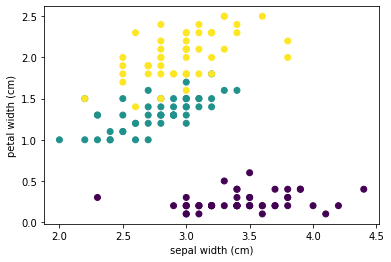

In [ ]:
# scatter plot to visualize class separation on the basis of sepal length and sepal width attributes
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df_class.values.tolist())
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.show()

# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()


# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()

# A clear high correlation exist between the petal length and petal width and also with the class levels as can be seen in the scatter plot (second plot)
# a linear regression line with proper class division fitting the  second plot can give a better accuracy for classification.

In [ ]:
# function for various components of SLP

class perceptron:
  def __init__(self, weights, learningRate):
    self.weights = weights
    self.learningRate = learningRate
    self.prediction = [0, 0, 0]
    self.finalActivationValue = [0, 0, 0]
  
  # computes the weighted sum
  def inputNode(self, feature_values, weight_values):
    sum = 0
    for i in range(len(feature_values)):
      sum += feature_values[i] * weight_values[i]
    return sum

  # activation function
  def transferFunction(self, weightedSum):
    if (weightedSum > 0): return 1
    return 0

  
  # computes the final class value during evaluation
  def classification(self, featureValues):
    for i in range(len(self.prediction)):
      self.prediction[i] = self.inputNode(featureValues, self.weights[i])  # considering the the class associaetd with the highest value of weighted sum as final class output 
    
    # assigning the class label associated with the highest output activation as the final class output
    max, temp = 0, 0
    for i in range(len(self.prediction)):
       if (self.prediction[i] > max):
         max = self.prediction[i]
         temp = i
    
    for i in range(len(self.prediction)):
      self.prediction[i] = 1 if (temp == i) else 0

  # computes the final activation function value at output node during training
  def forwardPass(self, featureValues):
    for i in range(len(self.finalActivationValue)):
      sum = self.inputNode(featureValues, self.weights[i])
      self.finalActivationValue[i] = self.transferFunction(sum)

  # Performs evaluation on a sample of input 
  def evaluation(self, featureDataSet, classDataSet):
    numOfMisClassification = 0
    for i in range(len(featureDataSet)):
      self.classification(featureDataSet[i])
      if (self.prediction[classDataSet[i]] == 0): numOfMisClassification += 1
    return ((1 - numOfMisClassification / len(featureDataSet)) * 100)

  # Training function
  def trainWeights(self, trainDataSet, trainClassDataSet):
    iteration = 0
    while (iteration <= 1000):
      #temp = [[0 for i in range(5)] for j in range(3)]
      for i in range(len(trainDataSet)):
        # forward pass
        self.forwardPass(trainDataSet[i])
        for j in range(3):
          val = 1 if (trainClassDataSet[i] == j) else 0
          diff = self.finalActivationValue[j] - val
          for k in range(5):
            # updating the weights
            self.weights[j][k] -= self.learningRate * trainDataSet[i][k] * diff

      iteration += 1

In [ ]:
# taking 80 % of the total dataset as training dataset
training_accuracy, testing_accuracy = [], []
for j in range(10):
  train_set = df.loc[indexSubSet1[j]]
  train_set['dummy'] = 1
  train_class_set = df_class.loc[indexSubSet1[j]]
  test_index = [x for x in list(set(index) - set(indexSubSet1[j]))]
  test_set = df.loc[test_index]
  test_set['dummy'] = 1
  test_class_set = df_class.loc[test_index]

  weights = [[0 for x in range(5)] for y in range(3)]
  irisClassifier = perceptron(weights, 0.01)

  irisClassifier.trainWeights(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])

  y = irisClassifier.evaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])
  z = irisClassifier.evaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i])
  training_accuracy.append(y)
  testing_accuracy.append(z)

  print("Accuracy on train Dataset = %f" %(y))
  print("Average accuracy on test dataset = %f\n" %(z))

Accuracy on train Dataset = 74.285714
Average accuracy on test dataset = 80.000000

Accuracy on train Dataset = 65.714286
Average accuracy on test dataset = 62.222222

Accuracy on train Dataset = 69.523810
Average accuracy on test dataset = 64.444444

Accuracy on train Dataset = 93.333333
Average accuracy on test dataset = 93.333333

Accuracy on train Dataset = 85.714286
Average accuracy on test dataset = 93.333333

Accuracy on train Dataset = 76.190476
Average accuracy on test dataset = 68.888889

Accuracy on train Dataset = 77.142857
Average accuracy on test dataset = 82.222222

Accuracy on train Dataset = 86.666667
Average accuracy on test dataset = 86.666667

Accuracy on train Dataset = 73.333333
Average accuracy on test dataset = 66.666667

Accuracy on train Dataset = 67.619048
Average accuracy on test dataset = 62.222222



In [ ]:
# uploading the result of 10 simulations in a csv file

upload_csv = pd.DataFrame(training_accuracy, columns=['Training Accuracy'])
upload_csv['Testing accuracy'] = testing_accuracy

upload_csv.to_csv('data_SLP.csv', index=False, header=True)

In [ ]:
# creating a instance of the SLP

training_accuracy, testing_accuracy = [], []
for x in range(1, 7):
  print("%d %s selected random training data" %(x * 10, '%'))
  avgTrainAccuracy, avgTestAccuracy = 0, 0
  for j in range(10):
    train_set = df.loc[indexSubSet[x-1][j]]
    train_set['dummy'] = 1
    train_class_set = df_class.loc[indexSubSet[x-1][j]]
    test_index = [x for x in list(set(index) - set(indexSubSet[x-1][j]))]
    test_set = df.loc[test_index]
    test_set['dummy'] = 1
    test_class_set = df_class.loc[test_index]

    # creating a object of the SLP
    weights = [[0 for x in range(5)] for y in range(3)]
    irisClassifier = perceptron(weights, 0.01)

    # training the weights
    irisClassifier.trainWeights(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])

    # evaluating the performance of the current weights
    avgTrainAccuracy += irisClassifier.evaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i])
    avgTestAccuracy += irisClassifier.evaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i])
  
  training_accuracy.append(avgTrainAccuracy/10)
  testing_accuracy.append(avgTestAccuracy/10)
  print("Average accuracy on train Dataset = %f" %(avgTrainAccuracy/10))
  print("Average accuracy on test dataset = %f\n" %(avgTestAccuracy/10))

10 % selected random training data
Average accuracy on train Dataset = 83.333333
Average accuracy on test dataset = 66.222222

20 % selected random training data
Average accuracy on train Dataset = 72.333333
Average accuracy on test dataset = 67.666667

30 % selected random training data
Average accuracy on train Dataset = 75.111111
Average accuracy on test dataset = 68.857143

40 % selected random training data
Average accuracy on train Dataset = 72.166667
Average accuracy on test dataset = 66.111111

50 % selected random training data
Average accuracy on train Dataset = 73.066667
Average accuracy on test dataset = 70.266667

60 % selected random training data
Average accuracy on train Dataset = 73.666667
Average accuracy on test dataset = 70.500000



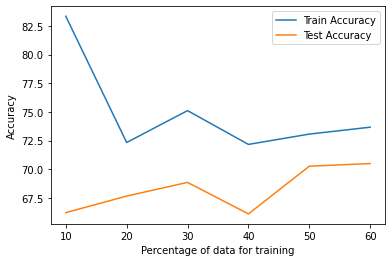

In [ ]:
percentageOfData = [x * 10 for x in range(1, 7)]
plt.plot(percentageOfData, training_accuracy, label = 'Train Accuracy')
plt.plot(percentageOfData, testing_accuracy, label = 'Test Accuracy')
plt.xlabel('Percentage of data for training')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Multilayer Perceptron MLP**

**Question 2**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
import math

# to prevent ipython from priniting any warning
warnings.filterwarnings('ignore')

In [ ]:
# load the iris dataset

iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# loading the class value samples into a dataframe
df_class = pd.DataFrame(iris.target, columns=['target'])

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


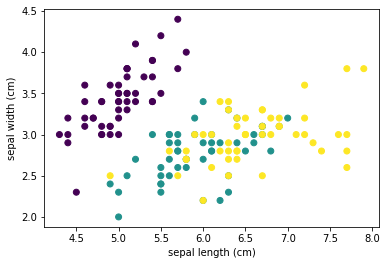

No handles with labels found to put in legend.


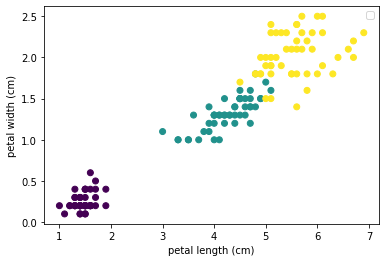

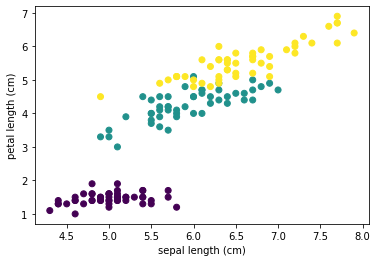

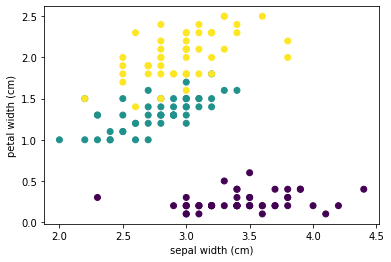

In [ ]:
# scatter plot to visualize class separation on the basis of sepal length and sepal width attributes
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df_class.values.tolist())
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.show()

# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()


# scatter plot to visualize class separation on the basis of petal length and petal width attributes
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'].values, c = df_class.values.tolist())
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.show()

# A clear high correlation exist between the petal length and petal width and also with the class levels as can be seen in the scatter plot (second plot)
# a linear regression line with proper class division fitting the  second plot can give a better accuracy for classification.

Neural net architecture contains, 3 nodes in input layer (including bias), 4 nodes in hidden layer and 1 node in output layer.

The architecture is as follows:
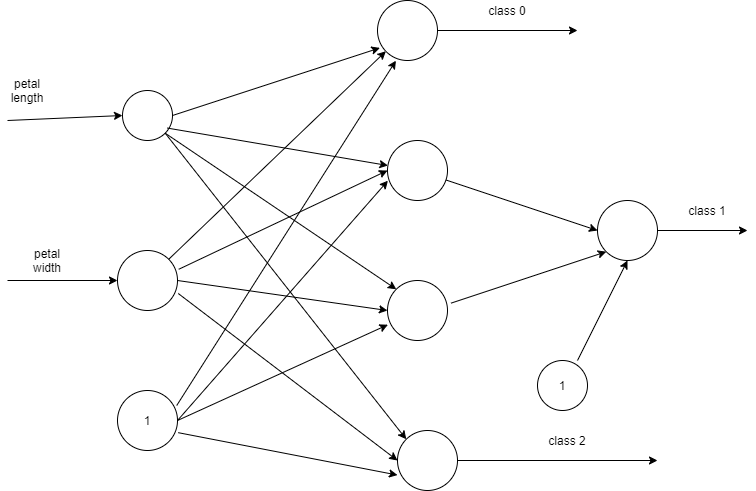

In [ ]:
class multiLayerPerceptron:
  def __init__(self, hiddenNodeWeights, outputNodeWeights, learningRate):
    self.hiddenNodeWeights = hiddenNodeWeights
    self.outputNodeWeights = outputNodeWeights
    self.learningRate = learningRate
    self.hiddenLayerOutput = [0, 0, 0, 0]
    self.outputLayerOutput = 0
    self.finalClassValues = [0, 0, 0]
    self.trainedHiddenWeights = [[0 for m in range(3)] for p in range(4)]
    self.trainedOutputWeights = [0 for m in range(3)]

  def linearCombination(self, inputs, weights):
    sum = 0
    for i in range(len(weights[:-1])):
      sum += inputs[i] * weights[i]
    sum += weights[-1]
    return sum
  
  def activationFunction(self, sum):
    return (1 / (1 + math.exp(-1 * sum)))   # sigmoid function
  
  def calcHiddenLayerOutput(self, inputs, isTrain):
    if (isTrain):
      for i in range(len(self.hiddenLayerOutput)):
        sum = self.linearCombination(inputs, self.hiddenNodeWeights[i])
        self.hiddenLayerOutput[i] = self.activationFunction(sum)
    else:
      for i in range(len(self.hiddenLayerOutput)):
        sum = self.linearCombination(inputs, self.trainedHiddenWeights[i])
        self.hiddenLayerOutput[i] = self.activationFunction(sum)
  
  def calcOutputLayerOutput(self, isTrain):
    if (isTrain):
      sum = self.linearCombination(self.hiddenLayerOutput[1:3], self.outputNodeWeights)
      self.outputLayerOutput = self.activationFunction(sum)
    else:
      sum = self.linearCombination(self.hiddenLayerOutput[1:3], self.trainedOutputWeights)
      self.outputLayerOutput = self.activationFunction(sum)
  
  def forwardPass(self, inputs, isTrain):
    self.calcHiddenLayerOutput(inputs, isTrain)
    self.calcOutputLayerOutput(isTrain)
    self.finalClassValues[0] = self.hiddenLayerOutput[0]
    self.finalClassValues[1] = self.outputLayerOutput 
    self.finalClassValues[2] = self.hiddenLayerOutput[3]


  def trainSubnet(self, featureValues, classValues, whichClass):  # function to train each subnet (recognising a certain class) separately
    if (whichClass == 0):
      iterations = 0
      while (iterations <= 15000):
        hiddenLayerGradient = [0.0 for m in range(3)]
        for i in range(len(featureValues)):
          # forward pass
          self.forwardPass(featureValues[i], 1)

          #backprop for only first class subnet
          val = 1 if classValues[i] == 0 else 0  # actual class value
          for j in range(len(hiddenLayerGradient) - 1):
            hiddenLayerGradient[j] += (self.hiddenLayerOutput[0] - val) * featureValues[i][j]
          hiddenLayerGradient[-1] += (self.hiddenLayerOutput[0] - val)
        
        #update weight values
        for j in range(len(hiddenLayerGradient)):
          self.hiddenNodeWeights[0][j] -= (self.learningRate / len(featureValues)) * hiddenLayerGradient[j]
        
        iterations += 1
      self.trainedHiddenWeights[0] = list(self.hiddenNodeWeights[0])
    
    if (whichClass == 2):
      iterations = 0
      while (iterations <= 15000):
        hiddenLayerGradient = [0.0 for m in range(3)]
        for i in range(len(featureValues)):
          # forward pass
          self.forwardPass(featureValues[i], 1)

          #backprop for only third class subnet
          val = 1 if classValues[i] == 2 else 0   # actual class value
          for j in range(len(hiddenLayerGradient) - 1):
            hiddenLayerGradient[j] += (self.hiddenLayerOutput[-1] - val) * featureValues[i][j]
          hiddenLayerGradient[-1] += (self.hiddenLayerOutput[-1] - val)

        # update weight values
        for j in range(len(hiddenLayerGradient)):
          self.hiddenNodeWeights[-1][j] -= (self.learningRate / len(featureValues)) * hiddenLayerGradient[j]
      
        iterations += 1
      self.trainedHiddenWeights[3] = list(self.hiddenNodeWeights[3])


    
    if (whichClass == 1):
      iterations = 0
      while (iterations <= 25000):
        outputLayerGradient = [0.0 for m in range(3)]
        hiddenLayerGradient = [[0.0 for m in range(3)] for p in range(2)]
        for i in range(len(featureValues)):
          # forward pass
          self.forwardPass(featureValues[i], 1)

          # backprop for only second class
          val = 1 if classValues[i] == 1 else 0  # actual class value
          # output layer gradient calculation
          for j in range(len(outputLayerGradient) - 1):
            outputLayerGradient[j] += (self.outputLayerOutput - val) * self.hiddenLayerOutput[j+1]
          outputLayerGradient[-1] += (self.outputLayerOutput - val)
          # hidden Layer gradient calculation for second class
          for j in range(len(hiddenLayerGradient)):
            diff = (self.outputLayerOutput - val) * self.outputNodeWeights[j]
            for k in range(len(hiddenLayerGradient[j]) - 1):
              hiddenLayerGradient[j][k] += diff * self.hiddenLayerOutput[j+1] * (1- self.hiddenLayerOutput[j+1]) * featureValues[i][k]
            hiddenLayerGradient[j][-1] += diff * self.hiddenLayerOutput[j+1] * (1 - self.hiddenLayerOutput[j+1])

        # update weights values
        # update output layer weights
        for i in range(len(self.outputNodeWeights)):
          self.outputNodeWeights[i] -= (self.learningRate / len(featureValues)) * outputLayerGradient[i]
        # update hidden Layer weights
        for i in range(len(self.hiddenNodeWeights) - 2):
          for j in range(len(self.hiddenNodeWeights[i+1])):
            self.hiddenNodeWeights[i+1][j] -= (self.learningRate / len(featureValues)) * hiddenLayerGradient[i][j]

        iterations += 1
      self.trainedOutputWeights = list(self.outputNodeWeights)
      self.trainedHiddenWeights[1] = list(self.hiddenNodeWeights[1])
      self.trainedHiddenWeights[2] = list(self.hiddenNodeWeights[2])  


  def evaluation(self, featureValues, classValues, whichClass):
    if (whichClass == -1):
      numOfMisclassification = 0
      for i in range(len(featureValues)):
        self.forwardPass(featureValues[i], 0)
        max, temp = 0, 0
        for j in range(len(self.finalClassValues)):
          if (self.finalClassValues[j] > max):
            max = self.finalClassValues[j]
            temp = j
        
        val = [1 if (temp == j) else 0 for j in range(len(self.finalClassValues))]
        #print(classValues[i])
        #print(val)
        if val.count(1) != 1:
          numOfMisclassification += 1
          continue
        if (val[classValues[i]] != 1): numOfMisclassification += 1
      return ((1.0 - (numOfMisclassification / len(featureValues))) * 100)
    else:
      numOfMisclassification = 0
      for i in range(len(featureValues)):
        self.forwardPass(featureValues[i], 0)
        val = 1 if (self.finalClassValues[whichClass] >= 0.5) else 0
        if ((classValues[i] == whichClass) and (val != 1)): numOfMisclassification += 1
      return ((1.0 - (numOfMisclassification / len(featureValues))) * 100)
    

In [ ]:
# taking 70 % of the total dataset as training dataset
training_accuracy, testing_accuracy = [], []
for j in range(10):
  train_set = df.loc[indexSubSet1[j]]
  train_class_set = df_class.loc[indexSubSet1[j]]
  test_index = [x for x in list(set(index) - set(indexSubSet1[j]))]
  test_set = df.loc[test_index]
  test_class_set = df_class.loc[test_index]

  outputNodeWeight = [0 for m in range(3)]
  hiddenNodeWeight = [[0 for m in range(3)] for p in range(4)]

  # creating a instance of the MLP
  mlp = multiLayerPerceptron(hiddenNodeWeight, outputNodeWeight, 0.01)

  # training the MLP
  mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 0) # training the subnet recognising class 0
  mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 1) # training the subnet recognising class 1
  mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 2) # training the subnet recognising class 2

  y = mlp.evaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], -1)
  z = mlp.evaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i], -1)
  training_accuracy.append(y)
  testing_accuracy.append(z)

In [ ]:
# uploading the result of 10 simulations in a csv file

upload_csv = pd.DataFrame(training_accuracy, columns=['Training Accuracy'])
upload_csv['Testing accuracy'] = testing_accuracy

upload_csv.to_csv('data_MLP.csv', index=False, header=True)

In [ ]:
# preparing the dataset
training_accuracy, testing_accuracy = [], []
for x in range(1, 7):
  print("%d %s selected random training data" %(x * 10, '%'))
  avgTrainAccuracy, avgTestAccuracy = 0, 0
  iters = 10
  for j in range(iters):
    train_set = df[['petal length (cm)', 'petal width (cm)']].loc[indexSubSet[x-1][j]]
    train_class_set = df_class.loc[indexSubSet[x-1][j]]
    test_index = [x for x in list(set(index) - set(indexSubSet[x-1][j]))]
    test_set = df[['petal length (cm)', 'petal width (cm)']].loc[test_index]
    test_class_set = df_class.loc[test_index]

    # initialzing the weight values
    outputNodeWeight = [0 for m in range(3)]
    #for i in range(len(outputNodeWeight)):
     # outputNodeWeight[i] = np.random.normal(0, 1 / math.sqrt(3))
    hiddenNodeWeight = [[0 for m in range(3)] for p in range(4)]
    #for i in range(len(hiddenNodeWeight)):
     # for j in range(len(hiddenNodeWeight[i])):
      #  hiddenNodeWeight[i][j] = np.random.normal(0, 1 / math.sqrt(3))
      #hiddenNodeWeight[i] = random.sample(hiddenNodeWeight[i], k=3)

    # creating a instance of the MLP
    mlp = multiLayerPerceptron(hiddenNodeWeight, outputNodeWeight, 0.01)

    # training the MLP
    mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 0) # training the subnet recognising class 0
    mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 1) # training the subnet recognising class 1
    mlp.trainSubnet(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], 2) # training the subnet recognising class 2
    
    # evaluating the performance of the current weights
    avgTrainAccuracy += mlp.evaluation(train_set.values.tolist(), [x for i in train_class_set.values.tolist() for x in i], -1)
    avgTestAccuracy += mlp.evaluation(test_set.values.tolist(), [x for i in test_class_set.values.tolist() for x in i], -1)
  
  training_accuracy.append(avgTrainAccuracy/iters)
  testing_accuracy.append(avgTestAccuracy/iters)
  print("Average accuracy on train Dataset = %f" %(avgTrainAccuracy/iters))
  print("Average accuracy on test dataset = %f\n" %(avgTestAccuracy/iters))

10 % selected random training data
Average accuracy on train Dataset = 94.666667
Average accuracy on test dataset = 90.444444

20 % selected random training data
Average accuracy on train Dataset = 89.333333
Average accuracy on test dataset = 86.833333

30 % selected random training data
Average accuracy on train Dataset = 91.777778
Average accuracy on test dataset = 90.000000

40 % selected random training data
Average accuracy on train Dataset = 93.833333
Average accuracy on test dataset = 91.666667

50 % selected random training data
Average accuracy on train Dataset = 95.066667
Average accuracy on test dataset = 95.200000

60 % selected random training data
Average accuracy on train Dataset = 94.000000
Average accuracy on test dataset = 95.000000



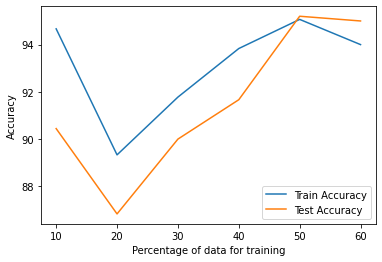

In [ ]:
percentageOfData = [x * 10 for x in range(1, 7)]
plt.plot(percentageOfData, training_accuracy, label = 'Train Accuracy')
plt.plot(percentageOfData, testing_accuracy, label = 'Test Accuracy')
plt.xlabel('Percentage of data for training')
plt.ylabel('Accuracy')
plt.legend()
plt.show()